<a href="https://colab.research.google.com/github/ikaGh/flight_delay_prediction/blob/main/CNN__pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/open iit data 24/final.csv', encoding='ISO-8859-1')

data


<ipython-input-27-d1b2eb6e9760>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/open iit data 24/final.csv', encoding='ISO-8859-1')


,Unnamed: 0,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,19038,2024,2024-01-15,20409,N945JT,616,14771,"San Francisco, CA",91,12478,...,10.6,7.2,15.0,0.0,NaN,54.0,9.0,NaN,1020.4,NaN
1,19039,2024,2024-01-28,19805,N990AU,341,11298,"Dallas/Fort Worth, TX",74,14492,...,7.8,1.1,16.7,0.0,0.0,282.0,10.1,NaN,1028.9,NaN
2,19040,2024,2024-01-02,19393,N7884G,3257,10821,"Baltimore, MD",35,14107,...,5.5,2.8,7.8,0.0,0.0,310.0,15.4,NaN,1019.9,NaN
3,19041,2024,2024-01-07,20304,N311SY,3848,13487,"Minneapolis, MN",63,13232,...,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,NaN,1015.0,NaN
4,19042,2024,2024-01-31,20452,N642RW,3493,12264,"Washington, DC",38,10785,...,4.9,2.8,6.7,0.0,0.0,33.0,6.8,NaN,1019.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,548681,2022,2022-12-20,20363,N293PQ,5136,10397,"Atlanta, GA",34,14814,...,0.9,-7.2,12.8,0.3,0.0,26.0,7.3,NaN,1020.1,NaN
546944,548682,2022,2022-12-07,20416,N649NK,144,13796,"Oakland, CA",91,12889,...,12.1,10.6,13.9,0.3,0.0,223.0,8.7,NaN,1021.9,NaN
546945,548683,2022,2022-12-10,19393,N492WN,3183,10693,"Nashville, TN",54,11259,...,5.7,4.4,7.2,5.8,0.0,1.0,2.2,NaN,1018.4,NaN
546946,548684,2022,2022-12-21,19393,N8727M,1364,12402,"Hilo, HI",2,12173,...,-16.4,-25.6,10.6,6.4,127.0,35.0,20.2,NaN,1029.2,NaN


In [ ]:
data = data.drop(columns=['index'])

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
columns_to_drop = ['Unnamed: 0', 'Year', 'DepartureDelayGroups',
                   'TaxiOut', 'WheelsOff', 'WheelsOn',
                   'TaxiIn', 'DivAirportLandings', 'wpgt', 'tsun', 'CRSElapsedTime', 'ActualElapsedTime', 'DepTime']

# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)



In [ ]:
# Assuming 'FlightDate' is a date column
data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')  # Convert to datetime
data['Year'] = data['FlightDate'].dt.year
data['Month'] = data['FlightDate'].dt.month
data['Day'] = data['FlightDate'].dt.day

# Optionally drop the original date column if no longer needed
data.drop(columns=['FlightDate'], inplace=True)
data.drop(columns=['Tail_Number'], inplace=True)


In [ ]:
data.drop(columns=['CRSArrTime'], inplace=True)
data.drop(columns=['ArrDelayMinutes'], inplace=True)
data.drop(columns=['ArrTime'], inplace=True)

In [ ]:
data.drop(columns=['AirTime'], inplace=True)

In [ ]:
# Drop rows where DepDelayMinutes is NaN
data = data.dropna(subset=['DepDelayMinutes'])


,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginCityName,0
OriginWac,0
DestAirportID,0
DestCityName,0
DestWac,0
CRSDepTime,0
DepDelayMinutes,0


In [ ]:
# Verify that there are no more NaN values
data.isnull().sum()

,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginCityName,0
OriginWac,0
DestAirportID,0
DestCityName,0
DestWac,0
CRSDepTime,0
DepDelayMinutes,0


In [ ]:
data.head()

,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,DestCityName,DestWac,CRSDepTime,DepDelayMinutes,...,tmin,tmax,prcp,snow,wdir,wspd,pres,Year,Month,Day
0,20409,616,14771,"San Francisco, CA",91,12478,"New York, NY",22,1556,14.0,...,7.2,15.0,0.0,NaN,54.0,9.0,1020.4,2024,1,15
1,19805,341,11298,"Dallas/Fort Worth, TX",74,14492,"Raleigh/Durham, NC",36,2059,7.0,...,1.1,16.7,0.0,0.0,282.0,10.1,1028.9,2024,1,28
2,19393,3257,10821,"Baltimore, MD",35,14107,"Phoenix, AZ",81,605,0.0,...,2.8,7.8,0.0,0.0,310.0,15.4,1019.9,2024,1,2
3,20304,3848,13487,"Minneapolis, MN",63,13232,"Chicago, IL",41,910,0.0,...,-5.0,-1.7,0.0,0.0,317.0,10.2,1015.0,2024,1,7
4,20452,3493,12264,"Washington, DC",38,10785,"Burlington, VT",16,1235,107.0,...,2.8,6.7,0.0,0.0,33.0,6.8,1019.2,2024,1,31


In [ ]:
columndrop = ["DepDelayMinutes","Diverted", "CancellationCode_encoded", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example for a specific column
label_encoder = LabelEncoder()
data['OriginCityName'] = label_encoder.fit_transform(data['OriginCityName'])
data['DestCityName'] = label_encoder.fit_transform(data['DestCityName'])

In [ ]:
# Fill NaN values with 0 across all columns
data.fillna(0, inplace=True)

# Verify that there are no more NaN values
data.isnull().sum()


,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginCityName,0
OriginWac,0
DestAirportID,0
DestCityName,0
DestWac,0
CRSDepTime,0
DepDelayMinutes,0


# Neural Networks

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 391.6774 - mae: 3.6837 - val_loss: 335.0229 - val_mae: 2.7212
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 383.4716 - mae: 3.6693 - val_loss: 335.4637 - val_mae: 2.8531
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 397.4705 - mae: 3.6974 - val_loss: 335.9676 - val_mae: 2.6471
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 370.9117 - mae: 3.6677 - val_loss: 337.0899 - val_mae: 2.4714
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 380.5124 - mae: 3.6509 - val_loss: 336.6769 - val_mae: 2.5926
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 391.0365 - mae: 3.6918 - val_loss: 335.2888 - val_mae: 2.9109
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 385.5191 - mae: 3.7078 - val_loss: 337.9006 - val_mae: 2.5581
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 379.9590 - mae: 3.6639 - val_loss: 335.1369 - val_mae: 2.9010


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


9947/9947 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 417.7228 - mae: 8.0202 - val_loss: 126.6437 - val_mae: 5.7510
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 135.4776 - mae: 6.0466 - val_loss: 131.9552 - val_mae: 5.2000
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 136.3519 - mae: 5.9723 - val_loss: 127.2622 - val_mae: 5.0421
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 133.1813 - mae: 5.9450 - val_loss: 128.3536 - val_mae: 5.1446
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 132.4982 - mae: 5.9155 - val_loss: 127.7467 - val_mae: 5.2200
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 124.0994 - mae: 5.8641 - val_loss: 128.9108 - val_mae: 5.2602
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 136.7777 - mae: 5.8940 - val_loss: 126.5240 - val_mae: 5.1061
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 139.9894 - mae: 5.8811 - val_loss: 125.1796 - val_mae: 5.1145
Epoch 9/20


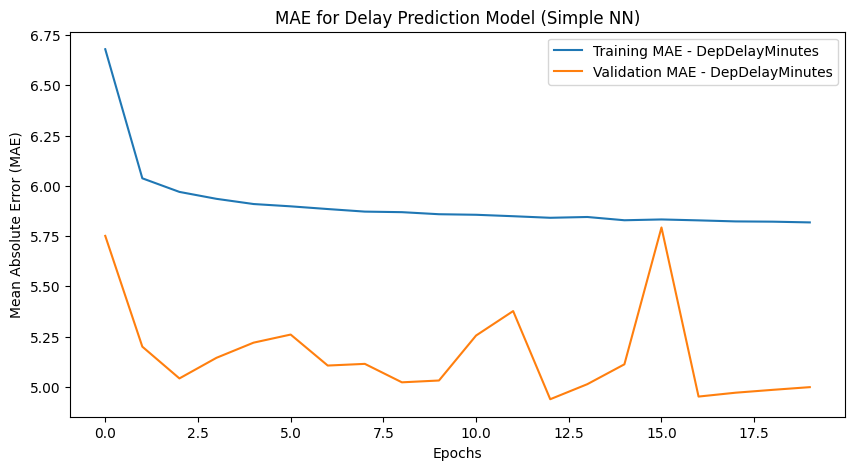

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Define delay components and set up train/test targets for delay component prediction
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Build a simple feedforward neural network model
model_simple_nn = Sequential()
model_simple_nn.add(layers.InputLayer(input_shape=(X_train_first.shape[1],)))
model_simple_nn.add(layers.Dense(128, activation='relu'))  # First hidden layer
model_simple_nn.add(layers.Dense(64, activation='relu'))   # Second hidden layer
model_simple_nn.add(layers.Dense(len(delay_components)))    # Output layer for delay components

model_simple_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the simple neural network model and capture training history
history_simple_nn = model_simple_nn.fit(X_train_first, y_train_first, epochs=20, batch_size=32, validation_split=0.2)

# Predict delay components on the test set
predictions_test_simple_nn = model_simple_nn.predict(X_test_first)

# Aggregate the predicted delay components for the test set
predicted_dep_delay_minutes_test = np.sum(predictions_test_simple_nn, axis=1)

# Prepare test features for the final delay prediction model
X_delay_test = np.concatenate([X_test_first, predicted_dep_delay_minutes_test.reshape(-1, 1)], axis=1)
y_delay_test = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
delay_sums_train = np.sum(y_train_first.to_numpy(), axis=1).reshape(-1, 1)
X_delay_train = scaler_delay.fit_transform(np.concatenate([X_train_first, delay_sums_train], axis=1))
X_delay_test = scaler_delay.transform(X_delay_test)

# Build the simple feedforward neural network model for the final delay prediction
model_delay_simple_nn = Sequential()
model_delay_simple_nn.add(layers.InputLayer(input_shape=(X_delay_train.shape[1],)))
model_delay_simple_nn.add(layers.Dense(128, activation='relu'))  # First hidden layer
model_delay_simple_nn.add(layers.Dense(64, activation='relu'))   # Second hidden layer
model_delay_simple_nn.add(layers.Dense(1))                       # Single output for DepDelayMinutes

model_delay_simple_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model on train data
history_delay_simple_nn = model_delay_simple_nn.fit(X_delay_train, train_data["DepDelayMinutes"], epochs=20, batch_size=32, validation_split=0.2)

# Predict and evaluate the model on the test data
y_pred_test_simple_nn = model_delay_simple_nn.predict(X_delay_test)
mae_test_simple_nn = np.mean(np.abs(y_pred_test_simple_nn.flatten() - y_delay_test))
print(f'Delay Prediction Model Test MAE (Simple NN): {mae_test_simple_nn:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay_simple_nn.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay_simple_nn.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model (Simple NN)')
plt.legend()
plt.show()


# CNN

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9947/9947 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 405.7270 - mae: 3.7204 - val_loss: 334.3870 - val_mae: 3.1190
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 385.0123 - mae: 3.6944 - val_loss: 334.1414 - val_mae: 3.0469
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 376.9426 - mae: 3.6556 - val_loss: 334.2164 - val_mae: 3.2408
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 394.0410 - mae: 3.7215 - val_loss: 333.9197 - val_mae: 3.0128
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 382.6959 - mae: 3.6766 - val_loss: 333.9789 - val_mae: 3.0726
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 374.0758 - mae: 3.6505 - val_loss: 334.0173 - val_mae: 3.1068
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 407.1804 - mae: 3.7217 - val_loss: 333.7538 - val_mae: 3.1096
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 384.8908 - mae: 3.7042 - val_loss: 334.3544 - val_mae: 3.0628
Epoch 9/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9947/9947 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 2925.9482 - mae: 22.2314 - val_loss: 2611.4380 - val_mae: 19.9835
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 2814.1980 - mae: 21.9529 - val_loss: 2610.8174 - val_mae: 18.8664
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 2946.4883 - mae: 22.1985 - val_loss: 2616.1506 - val_mae: 18.7582
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 2908.5813 - mae: 22.0837 - val_loss: 2613.8208 - val_mae: 18.8786
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 2950.1301 - mae: 22.1337 - val_loss: 2606.5176 - val_mae: 19.5231
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 2835.4658 - mae: 22.0314 - val_loss: 2608.0918 - val_mae: 20.0344
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 2770.5042 - mae: 21.8799 - val_loss: 2607.3931 - val_mae: 19.2354
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2936.0671 - mae: 22.0375 - val_loss: 2608.918

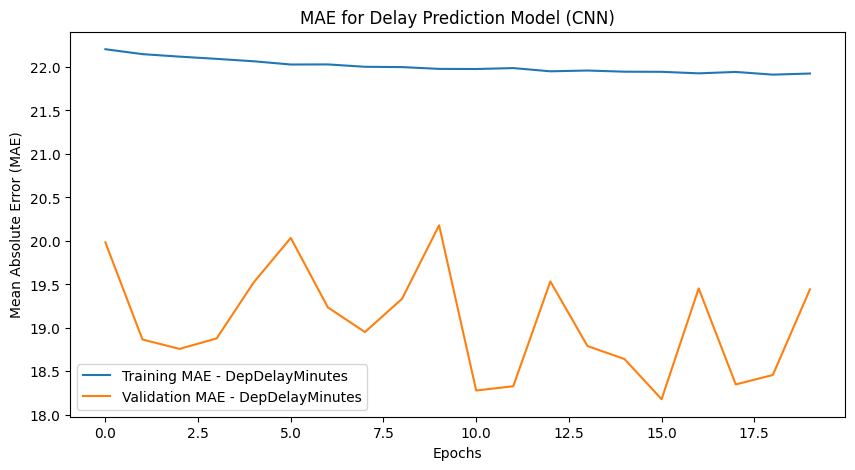

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Define delay components and set up train/test targets for delay component prediction
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

# Prepare features for delay component prediction
X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Reshape input data for CNN (samples, timesteps, features)
X_train_cnn = X_train_first.reshape((X_train_first.shape[0], X_train_first.shape[1], 1))
X_test_cnn = X_test_first.reshape((X_test_first.shape[0], X_test_first.shape[1], 1))

# Build a simple CNN model for predicting delay components
model_simple_cnn = Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(delay_components))  # Output layer for delay components
])

model_simple_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the CNN model and capture training history
history_simple_cnn = model_simple_cnn.fit(X_train_cnn, y_train_first, epochs=20, batch_size=32, validation_split=0.2)

# Predict delay components on the test set
predictions_test_cnn = model_simple_cnn.predict(X_test_cnn)

# Aggregate the predicted delay components for the test set
predicted_dep_delay_minutes_test = np.sum(predictions_test_cnn, axis=1)

# Prepare test features for the final delay prediction model
X_delay_test = np.concatenate([X_test_first, predicted_dep_delay_minutes_test.reshape(-1, 1)], axis=1)
y_delay_test = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
delay_sums_train = np.sum(y_train_first.to_numpy(), axis=1).reshape(-1, 1)
X_delay_train = scaler_delay.fit_transform(np.concatenate([X_train_first, delay_sums_train], axis=1))
X_delay_test = scaler_delay.transform(X_delay_test)

# Reshape input data for CNN
X_delay_train_cnn = X_delay_train.reshape((X_delay_train.shape[0], X_delay_train.shape[1], 1))
X_delay_test_cnn = X_delay_test.reshape((X_delay_test.shape[0], X_delay_test.shape[1], 1))

# Build the CNN model for the final delay prediction
model_delay_cnn = Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_delay_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)  # Single output for DepDelayMinutes
])

model_delay_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model on train data
history_delay_cnn = model_delay_cnn.fit(X_delay_train_cnn, train_data["DepDelayMinutes"], epochs=20, batch_size=32, validation_split=0.2)

# Predict and evaluate the model on the test data
y_pred_test_cnn = model_delay_cnn.predict(X_delay_test_cnn)
mae_test_cnn = np.mean(np.abs(y_pred_test_cnn.flatten() - y_delay_test))
print(f'Delay Prediction Model Test MAE (CNN): {mae_test_cnn:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay_cnn.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay_cnn.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model (CNN)')
plt.legend()
plt.show()


# GRU

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19893/19893 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 366.0112 - mae: 3.6097 - val_loss: 335.3074 - val_mae: 2.8216
Epoch 2/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - loss: 379.0054 - mae: 3.6964 - val_loss: 336.7349 - val_mae: 2.4323
Epoch 3/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 377.1390 - mae: 3.6352 - val_loss: 335.6372 - val_mae: 2.6009
Epoch 4/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 379.3719 - mae: 3.6610 - val_loss: 335.7033 - val_mae: 2.5024
Epoch 5/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 377.4809 - mae: 3.6358 - val_loss: 335.4079 - val_mae: 2.5942
Epoch 6/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 382.7123 - mae: 3.6726 - val_loss: 335.5307 - val_mae: 2.6359
Epoch 7/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - loss: 400.7808 - mae: 3.6933 - val_loss: 335.1854 - val_mae: 2.7351
Epoch 8/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 382.7309 - mae: 3.6668 - val_loss: 335.7537 - val_mae: 2.

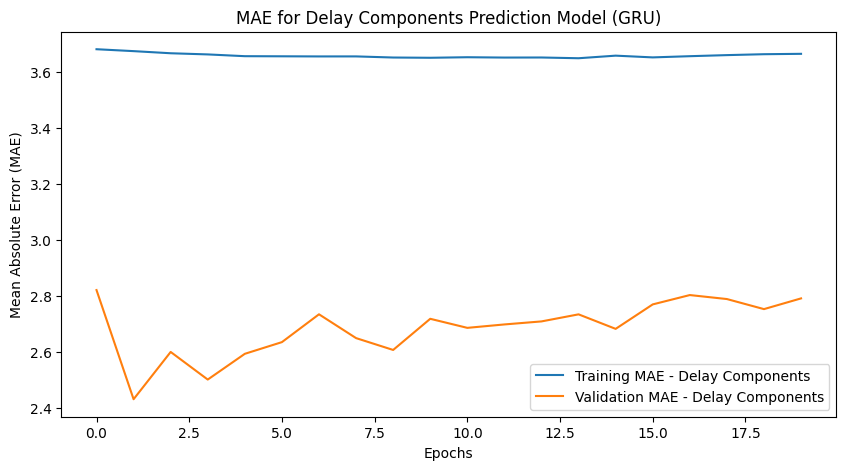

4349/4349 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6957/6957 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 3358.9722 - mae: 22.8907 - val_loss: 4098.5449 - val_mae: 27.7092
Epoch 2/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 3426.8752 - mae: 24.1220 - val_loss: 4095.8364 - val_mae: 29.3111
Epoch 3/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 3481.8882 - mae: 24.3619 - val_loss: 4086.4055 - val_mae: 28.9362
Epoch 4/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 3411.0984 - mae: 24.0242 - val_loss: 4087.9026 - val_mae: 28.8059
Epoch 5/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3234.3535 - mae: 23.8373 - val_loss: 4112.6914 - val_mae: 30.6095
Epoch 6/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 3591.6191 - mae: 24.3946 - val_loss: 4085.2876 - val_mae: 28.6071
Epoch 7/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 3414.5610 - mae: 24.0614 - val_loss: 4112.4321 - val_mae: 29.9821
Epoch 8/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 3375.5942 - mae: 23.8849 - val_loss: 4116.927

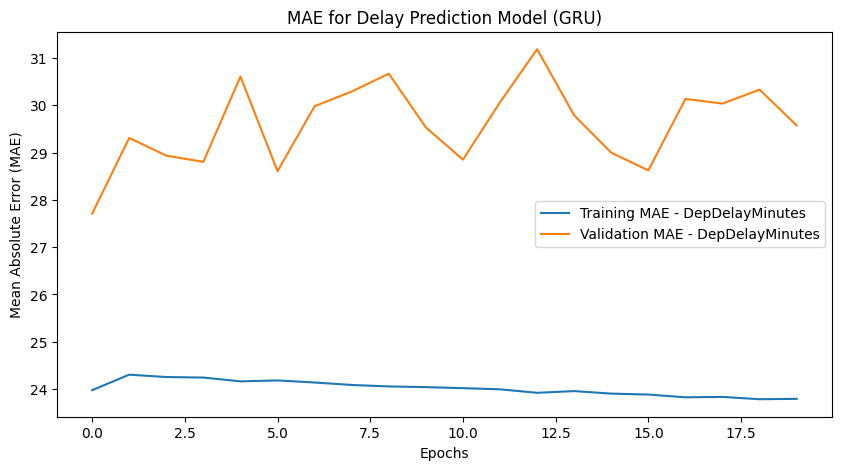

4349/4349 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Predicted Delay Times: [23.587303 10.946079  7.490566 ... 47.031162 20.561377 43.0366  ]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a 'Year' column
# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Delay components to predict first
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

# Prepare features for predicting delay components
X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Reshape the input data for GRU (samples, timesteps, features)
X_train_gru = X_train_first.reshape((X_train_first.shape[0], 1, X_train_first.shape[1]))
X_test_gru = X_test_first.reshape((X_test_first.shape[0], 1, X_test_first.shape[1]))

# Build the GRU model for predicting delay components
gru_model = keras.Sequential([
    layers.GRU(64, activation='tanh', input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True),
    layers.GRU(32, activation='tanh'),
    layers.Dense(len(delay_components))  # Output for each delay component
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model without early stopping
history_first = gru_model.fit(X_train_gru, y_train_first, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
loss_gru, mae_gru = gru_model.evaluate(X_test_gru, y_test_first)
print(f'GRU Model Test MAE for Delay Components: {mae_gru:.4f}')

# Plot MAE for the delay components prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_first.history['mae'], label='Training MAE - Delay Components')
plt.plot(history_first.history['val_mae'], label='Validation MAE - Delay Components')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Components Prediction Model (GRU)')
plt.legend()
plt.show()

# Step 4: Make predictions on the test set for delay components
predictions_gru = gru_model.predict(X_test_gru)

# Step 5: Create DepDelayMinutes based on the predictions of delay components
predicted_dep_delay_minutes = np.sum(predictions_gru, axis=1)

# Prepare the features for predicting DepDelayMinutes
X_delay = np.concatenate([X_test_first, predicted_dep_delay_minutes.reshape(-1, 1)], axis=1)

# Use the actual DepDelayMinutes values for 2024 as the target for the second model
y_delay = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
X_delay = scaler_delay.fit_transform(X_delay)

# Reshape the delay input for GRU
X_delay_gru = X_delay.reshape((X_delay.shape[0], 1, X_delay.shape[1]))

# Build the GRU model for delay prediction
delay_prediction_model_gru = keras.Sequential([
    layers.GRU(64, activation='tanh', input_shape=(X_delay_gru.shape[1], X_delay_gru.shape[2]), return_sequences=True),
    layers.GRU(32, activation='tanh'),
    layers.Dense(1)  # Single output for delay time
])

# Compile the model
delay_prediction_model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model without early stopping
history_delay = delay_prediction_model_gru.fit(X_delay_gru, y_delay, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the delay prediction model
loss_delay_gru, mae_delay_gru = delay_prediction_model_gru.evaluate(X_delay_gru, y_delay)
print(f'Delay Prediction GRU Model Test MAE: {mae_delay_gru:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model (GRU)')
plt.legend()
plt.show()

# Make predictions on the 2024 test set for delay time
predicted_delay_time_gru = delay_prediction_model_gru.predict(X_delay_gru)
print(f'Predicted Delay Times: {predicted_delay_time_gru.flatten()}')


# LSTM

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19893/19893 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 390.9655 - mae: 3.5967 - val_loss: 335.3001 - val_mae: 2.7497
Epoch 2/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 387.1098 - mae: 3.6665 - val_loss: 335.1797 - val_mae: 2.6678
Epoch 3/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 379.3048 - mae: 3.6305 - val_loss: 335.0975 - val_mae: 2.6619
Epoch 4/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 383.2995 - mae: 3.6667 - val_loss: 335.4736 - val_mae: 2.5440
Epoch 5/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 386.6929 - mae: 3.6434 - val_loss: 335.4896 - val_mae: 2.6126
Epoch 6/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 382.1593 - mae: 3.6269 - val_loss: 335.5624 - val_mae: 2.5432
Epoch 7/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 401.2780 - mae: 3.6748 - val_loss: 335.5483 - val_mae: 2.5641
Epoch 8/20
19893/19893 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 381.4839 - mae: 3.6160 - val_loss: 335.4912 - val_mae: 2.

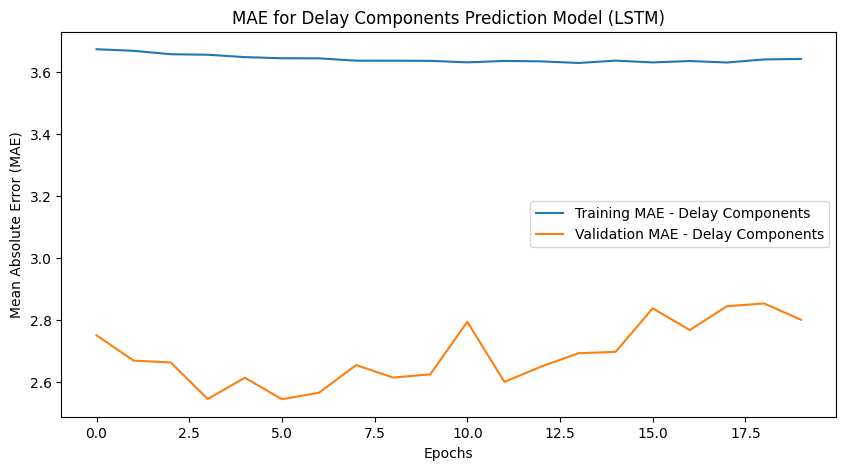

4349/4349 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6957/6957 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 3526.2998 - mae: 22.7250 - val_loss: 4115.7485 - val_mae: 27.8586
Epoch 2/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 3612.1060 - mae: 24.6211 - val_loss: 4105.6250 - val_mae: 28.8090
Epoch 3/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 3367.6299 - mae: 24.2044 - val_loss: 4109.9272 - val_mae: 30.0055
Epoch 4/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3384.7673 - mae: 23.9446 - val_loss: 4113.4902 - val_mae: 30.6057
Epoch 5/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3576.3657 - mae: 24.2287 - val_loss: 4097.8838 - val_mae: 29.7691
Epoch 6/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 3226.9800 - mae: 23.7824 - val_loss: 4103.7139 - val_mae: 29.7421
Epoch 7/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 3284.4856 - mae: 23.7347 - val_loss: 4112.4922 - val_mae: 30.1240
Epoch 8/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 3548.5452 - mae: 24.1074 - val_loss: 4096.572

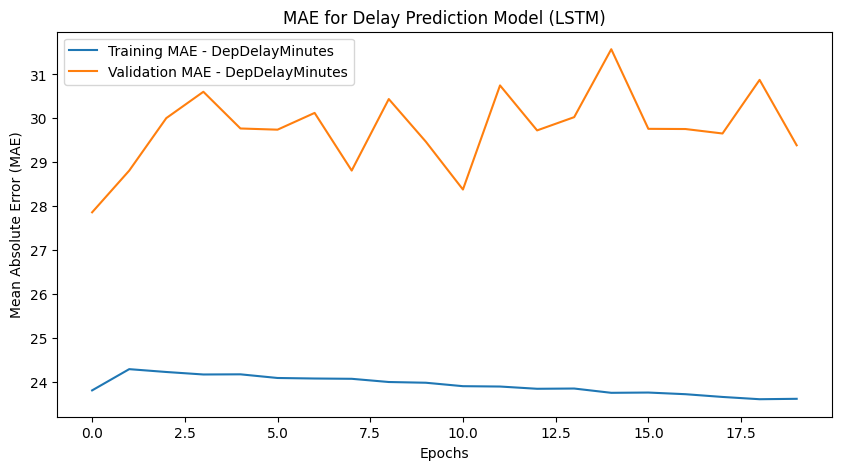

4349/4349 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Predicted Delay Times: [ 2.6076834 22.89259    9.24096   ... 51.19031   14.095193  53.381744 ]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a 'Year' column
# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Delay components to predict first
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

# Prepare features for predicting delay components
X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Reshape the input data for LSTM (samples, timesteps, features)
X_train_lstm = X_train_first.reshape((X_train_first.shape[0], 1, X_train_first.shape[1]))
X_test_lstm = X_test_first.reshape((X_test_first.shape[0], 1, X_test_first.shape[1]))

# Build the LSTM model for predicting delay components
lstm_model = keras.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    layers.LSTM(32, activation='tanh'),
    layers.Dense(len(delay_components))  # Output for each delay component
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model without early stopping
history_first = lstm_model.fit(X_train_lstm, y_train_first, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
loss_lstm, mae_lstm = lstm_model.evaluate(X_test_lstm, y_test_first)
print(f'LSTM Model Test MAE for Delay Components: {mae_lstm:.4f}')

# Plot MAE for the delay components prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_first.history['mae'], label='Training MAE - Delay Components')
plt.plot(history_first.history['val_mae'], label='Validation MAE - Delay Components')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Components Prediction Model (LSTM)')
plt.legend()
plt.show()

# Step 4: Make predictions on the test set for delay components
predictions_lstm = lstm_model.predict(X_test_lstm)

# Step 5: Create DepDelayMinutes based on the predictions of delay components
predicted_dep_delay_minutes = np.sum(predictions_lstm, axis=1)

# Prepare the features for predicting DepDelayMinutes
X_delay = np.concatenate([X_test_first, predicted_dep_delay_minutes.reshape(-1, 1)], axis=1)

# Use the actual DepDelayMinutes values for 2024 as the target for the second model
y_delay = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
X_delay = scaler_delay.fit_transform(X_delay)

# Reshape the delay input for LSTM
X_delay_lstm = X_delay.reshape((X_delay.shape[0], 1, X_delay.shape[1]))

# Build the LSTM model for delay prediction
delay_prediction_model_lstm = keras.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(X_delay_lstm.shape[1], X_delay_lstm.shape[2]), return_sequences=True),
    layers.LSTM(32, activation='tanh'),
    layers.Dense(1)  # Single output for delay time
])

# Compile the model
delay_prediction_model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model without early stopping
history_delay = delay_prediction_model_lstm.fit(X_delay_lstm, y_delay, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the delay prediction model
loss_delay_lstm, mae_delay_lstm = delay_prediction_model_lstm.evaluate(X_delay_lstm, y_delay)
print(f'Delay Prediction LSTM Model Test MAE: {mae_delay_lstm:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model (LSTM)')
plt.legend()
plt.show()

# Make predictions on the 2024 test set for delay time
predicted_delay_time_lstm = delay_prediction_model_lstm.predict(X_delay_lstm)
print(f'Predicted Delay Times: {predicted_delay_time_lstm.flatten()}')


# CNN-LSTM

Epoch 1/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 358.4550 - mae: 3.5923 - val_loss: 334.4449 - val_mae: 2.9717
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 380.0836 - mae: 3.7151 - val_loss: 334.2898 - val_mae: 2.9311
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 387.7850 - mae: 3.6684 - val_loss: 335.2496 - val_mae: 2.7381
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 382.7020 - mae: 3.6485 - val_loss: 335.8251 - val_mae: 2.6464
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 372.9153 - mae: 3.6530 - val_loss: 336.2222 - val_mae: 2.4862
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 390.3521 - mae: 3.6481 - val_loss: 335.4025 - val_mae: 2.7330
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 375.6447 - mae: 3.6315 - val_loss: 335.3927 - val_mae: 2.6274
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 363.8989 - mae: 3.6300 - val_loss: 335.8752 - val_mae: 2.5912


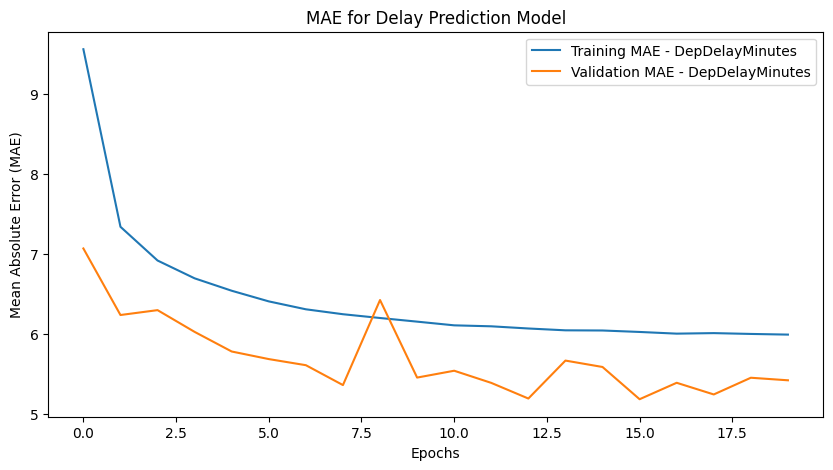

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Model

# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Define delay components and set up train/test targets for delay component prediction
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Reshape data for CNN-LSTM: (samples, timesteps, features)
X_train_first = X_train_first.reshape(X_train_first.shape[0], 1, X_train_first.shape[1])
X_test_first = X_test_first.reshape(X_test_first.shape[0], 1, X_test_first.shape[1])

# Build the CNN-LSTM model for predicting delay components
inputs = keras.Input(shape=(X_train_first.shape[1], X_train_first.shape[2]))
# Convolutional layer
x = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
# LSTM layer
x = layers.LSTM(64)(x)
# Output layer for delay components
x = layers.Dense(len(delay_components))(x)

model_first = Model(inputs=inputs, outputs=x)
model_first.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the first model and capture training history
history_first = model_first.fit(X_train_first, y_train_first, epochs=20, batch_size=32, validation_split=0.2)

# Predict delay components on the test set
predictions_test_first = model_first.predict(X_test_first)

# Aggregate the predicted delay components for the test set
predicted_dep_delay_minutes_test = np.sum(predictions_test_first, axis=1)

# Prepare test features for the final delay prediction model
X_delay_test = np.concatenate([X_test_first.reshape(X_test_first.shape[0], -1), predicted_dep_delay_minutes_test.reshape(-1, 1)], axis=1)
y_delay_test = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
delay_sums_train = np.sum(y_train_first.to_numpy(), axis=1).reshape(-1, 1)
X_delay_train = scaler_delay.fit_transform(np.concatenate([X_train_first.reshape(X_train_first.shape[0], -1), delay_sums_train], axis=1))
X_delay_test = scaler_delay.transform(X_delay_test)

# Build the CNN-LSTM model for the final delay prediction
inputs = keras.Input(shape=(X_delay_train.shape[1],))
x = layers.Reshape((1, X_delay_train.shape[1]))(inputs)  # Use Reshape layer
x = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(x)
x = layers.LSTM(64)(x)
x = layers.Dense(1)(x)  # Single output for DepDelayMinutes

model_delay = Model(inputs=inputs, outputs=x)
model_delay.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model on train data
history_delay = model_delay.fit(X_delay_train, train_data["DepDelayMinutes"], epochs=20, batch_size=32, validation_split=0.2)

# Predict and evaluate the model on the test data
y_pred_test = model_delay.predict(X_delay_test)
mae_test = np.mean(np.abs(y_pred_test.flatten() - y_delay_test))
print(f'Delay Prediction Model Test MAE: {mae_test:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Define tolerance level for percentage accuracy calculation (e.g., 10%)
tolerance_percentage = 0.1

# Function to calculate percentage accuracy within a tolerance
def calculate_percentage_accuracy(y_true, y_pred, tolerance_percentage):
    within_tolerance = np.abs(y_true - y_pred) <= tolerance_percentage * np.abs(y_true)
    accuracy = np.mean(within_tolerance) * 100
    return accuracy

# Calculate R^2 score and percentage accuracy for delay components model
r2_delay_components = r2_score(y_test_first, predictions_cnn_lstm)
accuracy_delay_components = calculate_percentage_accuracy(y_test_first.values.flatten(), predictions_cnn_lstm.flatten(), tolerance_percentage)
print(f'Delay Components Model R^2 Score: {r2_delay_components:.4f}')
print(f'Delay Components Model Accuracy within {tolerance_percentage * 100}%: {accuracy_delay_components:.2f}%')

# Calculate R^2 score and percentage accuracy for DepDelayMinutes model
r2_dep_delay_minutes = r2_score(y_delay, predicted_delay_time_cnn_lstm)
accuracy_dep_delay_minutes = calculate_percentage_accuracy(y_delay.values, predicted_delay_time_cnn_lstm.flatten(), tolerance_percentage)
print(f'DepDelayMinutes Prediction Model R^2 Score: {r2_dep_delay_minutes:.4f}')
print(f'DepDelayMinutes Prediction Model Accuracy within {tolerance_percentage * 100}%: {accuracy_dep_delay_minutes:.2f}%')


Delay Components Model R^2 Score: 0.1660
Delay Components Model Accuracy within 10.0%: 0.28%
DepDelayMinutes Prediction Model R^2 Score: 0.7871
DepDelayMinutes Prediction Model Accuracy within 10.0%: 6.53%


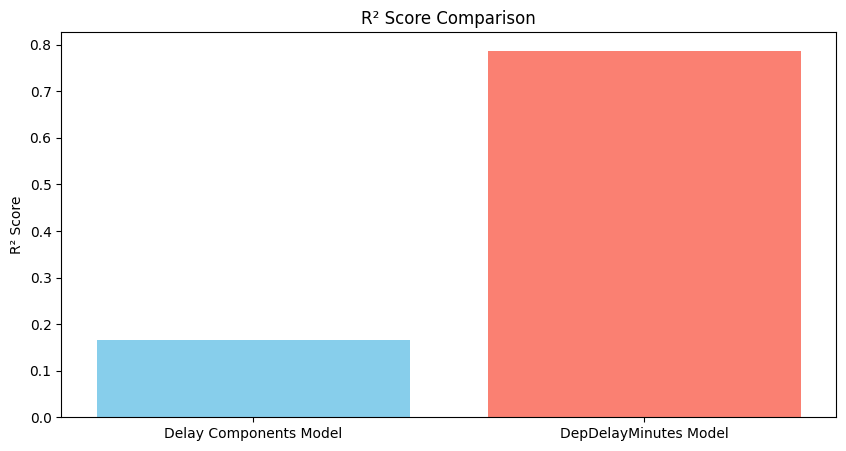

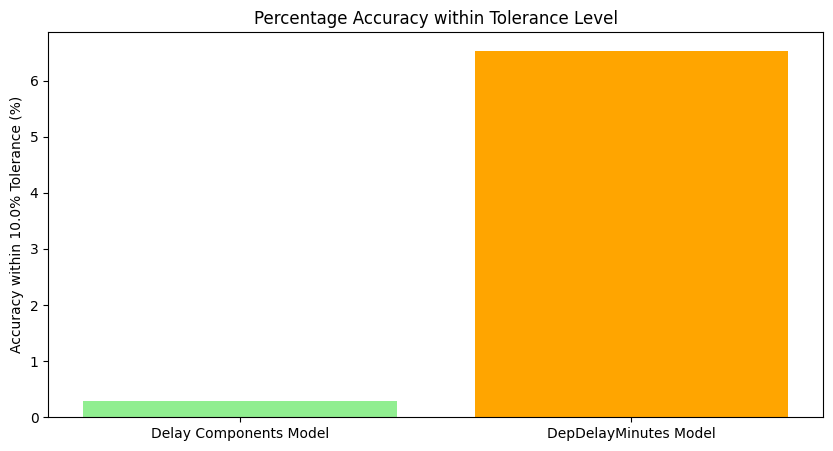

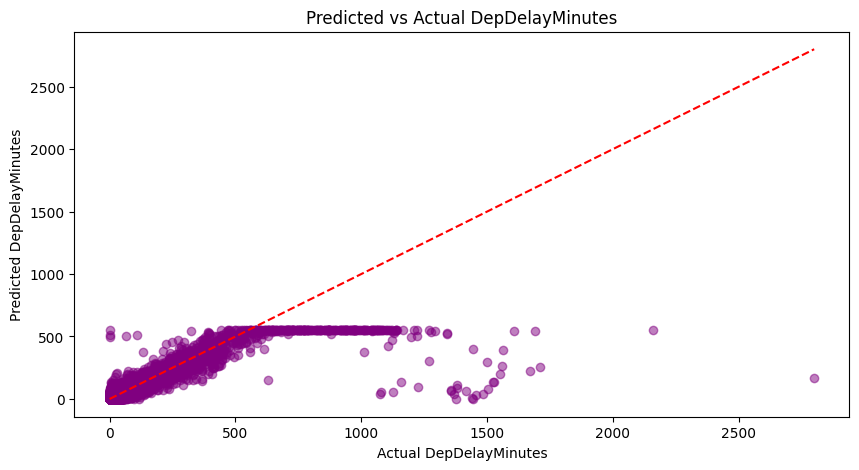

In [ ]:
import matplotlib.pyplot as plt

# Plot R² Scores
plt.figure(figsize=(10, 5))
plt.bar(['Delay Components Model', 'DepDelayMinutes Model'], [r2_delay_components, r2_dep_delay_minutes], color=['skyblue', 'salmon'])
plt.ylabel('R² Score')
plt.title('R² Score Comparison')
plt.show()

# Plot Percentage Accuracy within Tolerance
plt.figure(figsize=(10, 5))
plt.bar(['Delay Components Model', 'DepDelayMinutes Model'], [accuracy_delay_components, accuracy_dep_delay_minutes], color=['lightgreen', 'orange'])
plt.ylabel(f'Accuracy within {tolerance_percentage * 100}% Tolerance (%)')
plt.title('Percentage Accuracy within Tolerance Level')
plt.show()

# Scatter plot of Predicted vs Actual for DepDelayMinutes
plt.figure(figsize=(10, 5))
plt.scatter(y_delay, predicted_delay_time_cnn_lstm.flatten(), color='purple', alpha=0.5)
plt.plot([y_delay.min(), y_delay.max()], [y_delay.min(), y_delay.max()], 'r--')  # Line y=x for reference
plt.xlabel('Actual DepDelayMinutes')
plt.ylabel('Predicted DepDelayMinutes')
plt.title('Predicted vs Actual DepDelayMinutes')
plt.show()

# ResNet

Epoch 1/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 382.0746 - mae: 3.6673 - val_loss: 334.7033 - val_mae: 2.8323
Epoch 2/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 388.6514 - mae: 3.6796 - val_loss: 335.5628 - val_mae: 2.6986
Epoch 3/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 405.4714 - mae: 3.7343 - val_loss: 335.2350 - val_mae: 2.6497
Epoch 4/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 404.2104 - mae: 3.7251 - val_loss: 335.5606 - val_mae: 2.5514
Epoch 5/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 417.6397 - mae: 3.7226 - val_loss: 335.0752 - val_mae: 2.7723
Epoch 6/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 391.2102 - mae: 3.6942 - val_loss: 334.7413 - val_mae: 2.7581
Epoch 7/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 388.6613 - mae: 3.6631 - val_loss: 335.2845 - val_mae: 2.6730
Epoch 8/20
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 370.0726 - mae: 3.6399 - val_loss: 335.1027 - val_mae: 2.7336


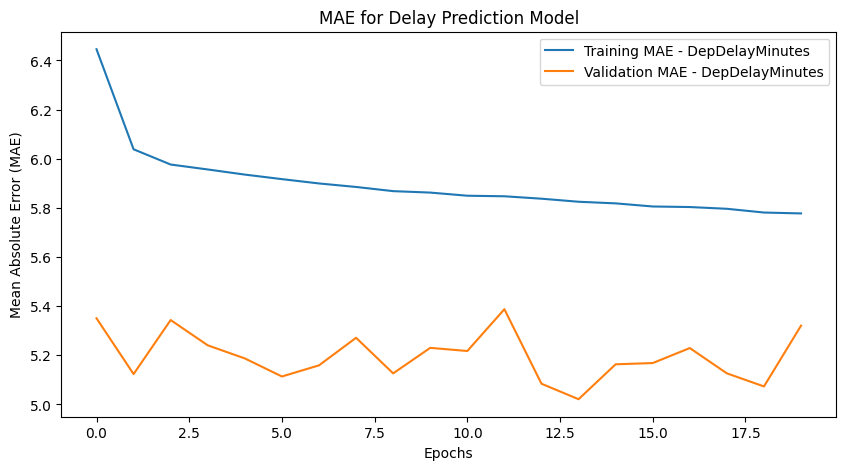

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Model

# Separate 2024 data as the test set
train_data = data[data['Year'] != 2024]
test_data = data[data['Year'] == 2024]

# Define delay components and set up train/test targets for delay component prediction
delay_components = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Diverted", "CancellationCode_encoded"]
y_train_first = train_data[delay_components]
y_test_first = test_data[delay_components]

X_train_first = train_data.drop(columns=["DepDelayMinutes"] + delay_components)
X_test_first = test_data.drop(columns=["DepDelayMinutes"] + delay_components)

# Scale the features
scaler_first = StandardScaler()
X_train_first = scaler_first.fit_transform(X_train_first)
X_test_first = scaler_first.transform(X_test_first)

# Define a residual block for the ResNet structure
def residual_block(x, units):
    shortcut = x
    x = layers.Dense(units, activation='relu')(x)
    x = layers.Dense(units)(x)
    if shortcut.shape[-1] != units:
        shortcut = layers.Dense(units)(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Build the ResNet model for predicting delay components
inputs = keras.Input(shape=(X_train_first.shape[1],))
x = residual_block(inputs, 64)
x = residual_block(x, 64)
x = layers.Dense(len(delay_components))(x)  # Output layer for delay components

model_first = Model(inputs=inputs, outputs=x)
model_first.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the first model and capture training history
history_first = model_first.fit(X_train_first, y_train_first, epochs=20, batch_size=32, validation_split=0.2)

# Predict delay components on the test set
predictions_test_first = model_first.predict(X_test_first)

# Aggregate the predicted delay components for the test set
predicted_dep_delay_minutes_test = np.sum(predictions_test_first, axis=1)

# Prepare test features for the final delay prediction model
X_delay_test = np.concatenate([X_test_first, predicted_dep_delay_minutes_test.reshape(-1, 1)], axis=1)
y_delay_test = test_data["DepDelayMinutes"]

# Scale the features for delay prediction
scaler_delay = StandardScaler()
# Convert the summed delays to a numpy array before reshaping
delay_sums_train = np.sum(y_train_first.to_numpy(), axis=1).reshape(-1, 1)
X_delay_train = scaler_delay.fit_transform(np.concatenate([X_train_first, delay_sums_train], axis=1))
X_delay_test = scaler_delay.transform(X_delay_test)

# Build the ResNet model for the final delay prediction
inputs = keras.Input(shape=(X_delay_train.shape[1],))
x = residual_block(inputs, 64)
x = residual_block(x, 64)
x = layers.Dense(1)(x)  # Single output for DepDelayMinutes

model_delay = Model(inputs=inputs, outputs=x)
model_delay.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the delay prediction model on train data
history_delay = model_delay.fit(X_delay_train, train_data["DepDelayMinutes"], epochs=20, batch_size=32, validation_split=0.2)

# Predict and evaluate the model on the test data
y_pred_test = model_delay.predict(X_delay_test)
mae_test = np.mean(np.abs(y_pred_test.flatten() - y_delay_test))
print(f'Delay Prediction Model Test MAE: {mae_test:.4f}')

# Plot MAE for the delay prediction model
plt.figure(figsize=(10, 5))
plt.plot(history_delay.history['mae'], label='Training MAE - DepDelayMinutes')
plt.plot(history_delay.history['val_mae'], label='Validation MAE - DepDelayMinutes')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Delay Prediction Model')
plt.legend()
plt.show()


In [ ]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    'Actual_DepDelayMinutes': y_delay_test,
    'Predicted_DepDelayMinutes': y_pred_test.flatten()  # Flatten to 1D array
})

# Display the first few rows of the predictions DataFrame
predictions_df

# Optionally, you can save the predictions to a CSV file
#predictions_df.to_csv('predicted_delays.csv', index=False)


,Actual_DepDelayMinutes,Predicted_DepDelayMinutes
0,14.0,14.603692
1,7.0,19.262274
2,0.0,1.710473
3,0.0,1.857432
4,107.0,10.453065
...,...,...
375683,114.0,38.195091
375684,0.0,6.296035
375685,5.0,16.200390
375686,0.0,1.404753


In [ ]:
!pip install shap


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


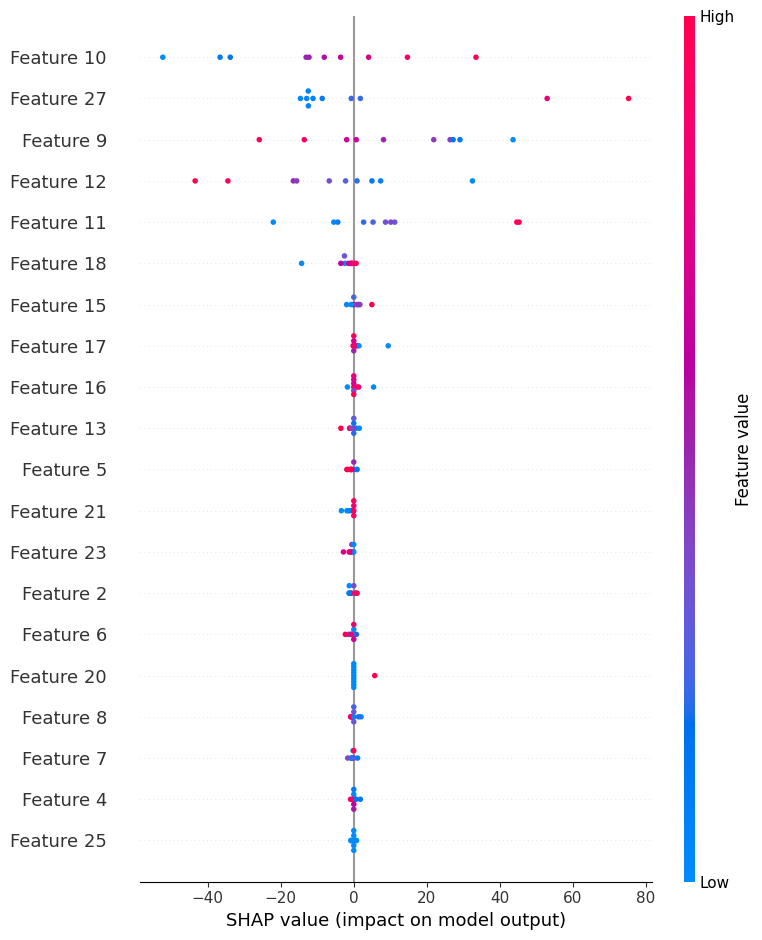

In [ ]:
import shap
import pandas as pd
import numpy as np

# Sample K=10 data points for SHAP background
background_sample = shap.sample(pd.DataFrame(X_delay), 10)

# Ensure feature_names is a list of strings, regardless of X_delay type
feature_names = (
    list(X_delay.columns) if isinstance(X_delay, pd.DataFrame)
    else [f'Feature {i+1}' for i in range(X_delay.shape[1])]
)

# Convert X_delay to a DataFrame if it isn’t already (ensures consistent handling of column names)
X_delay_df = pd.DataFrame(X_delay, columns=feature_names) if not isinstance(X_delay, pd.DataFrame) else X_delay

# Initialize SHAP explainer with the sampled background data
explainer = shap.KernelExplainer(model_delay.predict, background_sample)

# Compute SHAP values for a subset of the test set to manage interpretability and speed (e.g., first 10 samples)
shap_values = explainer.shap_values(X_delay_df[:10])

# Convert shap_values to 2D if it's 3D
if isinstance(shap_values, list):
    shap_values = np.array(shap_values)
if len(shap_values.shape) == 3 and shap_values.shape[2] == 1:
    shap_values = shap_values.reshape(shap_values.shape[0], shap_values.shape[1])

# Plot the summary plot for SHAP values to visualize feature importance
shap.summary_plot(shap_values, X_delay_df[:10], feature_names=feature_names)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

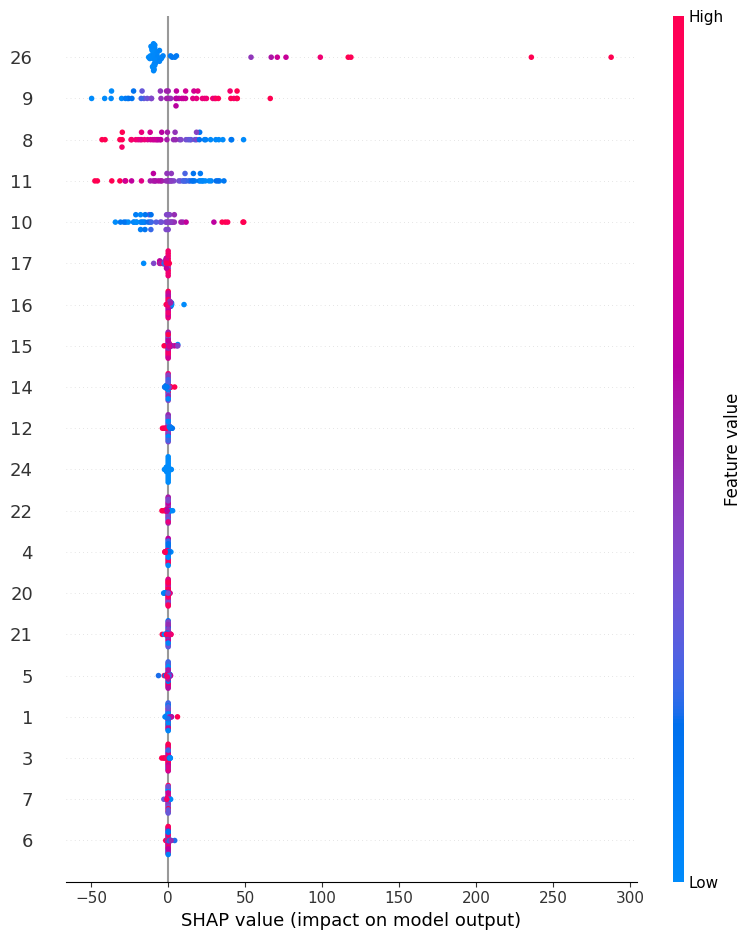

In [ ]:
import shap
import pandas as pd
import numpy as np

# Ensure X_delay is a DataFrame; create it if it's not already one
X_delay_df = pd.DataFrame(X_delay) if not isinstance(X_delay, pd.DataFrame) else X_delay

# Obtain feature names from the DataFrame
feature_names = list(X_delay_df.columns)

# Sample K=10 data points for SHAP background
background_sample = shap.sample(X_delay_df, 50)

# Initialize SHAP explainer with the sampled background data
explainer = shap.KernelExplainer(model_delay.predict, background_sample)

# Compute SHAP values for a subset of the test set (first 10 samples)
shap_values = explainer.shap_values(X_delay_df[:50])

# Reshape shap_values if necessary to fit plot dimensions
if isinstance(shap_values, list):
    shap_values = np.array(shap_values)
if len(shap_values.shape) == 3 and shap_values.shape[2] == 1:
    shap_values = shap_values.squeeze()  # Convert to (samples, features) shape

# Plot the summary plot with correct feature names
shap.summary_plot(shap_values, X_delay_df[:50], feature_names=feature_names)


In [ ]:
X_delay_df.columns


RangeIndex(start=0, stop=27, step=1)

# MAP


In [ ]:
import numpy as np
import random

class FlightSchedulingEnv:
    def __init__(self, flights):
        self.flights = flights  # List of flights with details
        self.state = self.reset()

    def reset(self):
        # Reset the environment to the initial state
        self.state = self.flights.copy()
        return self.state

    def step(self, action):
        # Extract flight index and adjustment from the action
        flight_index = action // 3  # Determine which flight to adjust
        adjustment = (action % 3 - 1) * 5  # Adjust time by -5, 0, or +5 minutes

        # Adjust the selected flight's delay
        if flight_index < len(self.state):  # Ensure index is valid
            self.state[flight_index]['DepDelayMinutes'] += adjustment

        # Calculate the reward (negative total delay)
        reward = -self.calculate_total_delay()

        # Check if the episode is done (e.g., if all delays are zero or negative)
        done = self.is_done()

        return self.state, reward, done

    def calculate_total_delay(self):
        # Calculate the total delay from the current state
        total_delay = sum(flight['DepDelayMinutes'] for flight in self.state)
        return total_delay

    def is_done(self):
        # Define the end condition for the episode
        return all(flight['DepDelayMinutes'] <= 0 for flight in self.state)

    def get_state_representation(self):
        # Create a state representation based on the flight variables
        state_representation = []
        for flight in self.state:
            # Collect relevant features
            state_representation.append([
                flight['DepDelayMinutes'],
                flight['Distance'],
                flight['FlightID'],
                flight['OriginCity'],
                flight['DestinationCity'],
                flight['FlightDate'],
            ])
        return np.array(state_representation)

class QLearningAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((state_size, action_size))
        self.learning_rate = 0.1
        self.discount_factor = 0.95
        self.exploration_rate = 1.0
        self.exploration_decay = 0.99
        self.exploration_min = 0.1

    def choose_action(self, state_index):
        if random.uniform(0, 1) < self.exploration_rate:
            return random.randint(0, self.action_size - 1)  # Explore
        return np.argmax(self.q_table[state_index])  # Exploit

    def learn(self, state_index, action, reward, next_state_index):
        # Update Q-value
        best_next_action = np.argmax(self.q_table[next_state_index])
        td_target = reward + self.discount_factor * self.q_table[next_state_index][best_next_action]
        td_delta = td_target - self.q_table[state_index][action]
        self.q_table[state_index][action] += self.learning_rate * td_delta

        # Decay exploration rate
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay

# Function to simulate predictions from the CNN model
def predict_delays(flights):
    # Placeholder function for CNN model predictions
    # This should return the predicted delays based on input features
    return [random.randint(0, 60) for _ in flights]  # Example: Random predictions

# Simulating the environment and training the agent
num_flights = 100
flights = [
    {
        'FlightID': i,
        'DepDelayMinutes': 0,
        'Distance': random.randint(100, 1000),
        'OriginCity': f'City{random.randint(1, 10)}',
        'DestinationCity': f'City{random.randint(1, 10)}',
        'FlightDate': f'2024-10-{random.randint(1, 31)}'  # Example date
    }
    for i in range(num_flights)
]  # Example flights with delays, distances, and additional info

# Get predicted delays from the CNN model
predicted_delays = predict_delays(flights)

# Update flight data with predicted delays
for i, flight in enumerate(flights):
    flight['DepDelayMinutes'] = predicted_delays[i]

env = FlightSchedulingEnv(flights)

state_size = len(flights)
action_size = state_size * 3  # 3 actions per flight: -5 minutes, 0 minutes, +5 minutes
agent = QLearningAgent(state_size, action_size)

num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        state_representation = env.get_state_representation()
        state_index = episode % state_size  # Simple state representation based on episodes
        action = agent.choose_action(state_index)
        next_state, reward, done = env.step(action)
        next_state_index = episode % state_size  # Simple state representation based on episodes
        agent.learn(state_index, action, reward, next_state_index)

# The Q-table now contains learned policies for optimizing flight delays
print("Training complete.")
print("Q-Table:")
print(agent.q_table)


KeyboardInterrupt: 